In [213]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as sps
import pandas as pd
import random
import seaborn as sns
import json

In [155]:
#Model Variables and Parameters
age_average_x=20
# Current average ages in years for underground and overhead distribution lines (in years)
length_average_x=0.5
# Circuit length in miles for underground and overhead transission and distribution lines
number_circuit= 625
# Numbers showing different circuit in network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line, eaach circuit is about 25 miles in Larsen paper)
baseyear=2021
#the year in which we are going to start conducting cost analysis
underground_baseyear=121
#Length of undergeound lines in miles in base year
overhead_baseyear=191
#Length of overhead lines in miles in base year
r=0.1
# Discount rate=10%
easment_value=3000
# per-acre price of a conservation easement  in year t
nfir=2100
# Non-fatality incidence rates, number of accidents per 100000 workers
fir=15
# Fatality incidence rates, number of accidents per 100000 workers
employees=8514/255
#The number of IOU employees
injurycost=130658
#A randomly determined annual injury cost, per accident
vsl=6900000
#The value of a statistical life
overhead_line={'lifespan':60,'replcost':104000,'replcost_growth_rate':0,'om_growth_rate':0.05,'om_percentage_replcost':0.005,'corridor_length':60}
underground_line={'lifespan':40,'replcost':357000,'replcost_growth_rate':0,'om_growth_rate':0.05,'om_percentage_replcost':0.005,'corridor_length':120}
#overhead_line={'underground':0,'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
#underground_line={'underground':1,'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
# underground= Type of Line. x=0 for underground distribution lines and x=1 for overhead distribution lines
#lifespan=Useful lifespan of overhead line and underground lines (60 for overhead and 45 for underground)
#replcost_growth_rate= replacement cost annual growth/decay rate 
# om_percentage_replcost= percentage of the overall replacement costs which equals to annual O&M expenses (OPEX) for each type of T&D line
# corridor_length= length of the corridor in feet
###

In [156]:
#shape_age_x=(age_average_x)/(((age_average_x)/2)**2)
#Shape of Gamma distribution required for simulating liene circuits ages
#print(shape_age_x)

In [157]:
#scale_age_x=(((age_average_x)/2)**2)/(age_average_x)
#scale of Gamma distribution required for simulating line circuits ages
#print(scale_age_x)

In [158]:
#x = np.linspace(0, 20, 20)
#y = stats.gamma.pdf(x, shape_age_x, scale_age_x)

#plt.plot(x, y, "ro-", label=(r'$Shape=0.2, Scale=5$'))
#plt.legend(loc='upper right')

In [159]:
#shape_length_x=length_average_x/(length_average_x/2)**2
#Shape of Gamma distribution required for simulating line circuits lengths
#print(shape_length_x)

In [160]:
#scale_length_x=(length_average_x/2)**2/length_average_x
#scale of Gamma distribution required for simulating line circuits ages
#print(scale_length_x)

In [161]:
#x = np.linspace(0, 20, 20)
#y = stats.gamma.pdf(x, shape_length_x, scale_length_x)

#plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
#plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits lengths

In [162]:
#age=np.random.gamma(shape_age_x,scale_age_x,number_circuit)
#plt.hist(np.random.gamma(shape_age_x,scale_age_x,number_circuit),alpha=0.5,bins=50)
#plt.show()
#print (age)
#Randomly determined circuit's ages in the base year

In [163]:
#lengths=np.random.gamma(shape_length_x,scale_length_x,number_circuit)
#plt.hist(np.random.gamma(shape_length_x,scale_length_x,number_circuit),alpha=0.5,bins=50)
#plt.show()
#print (lengths)
#Randomly determined circuit's lengths in the base year

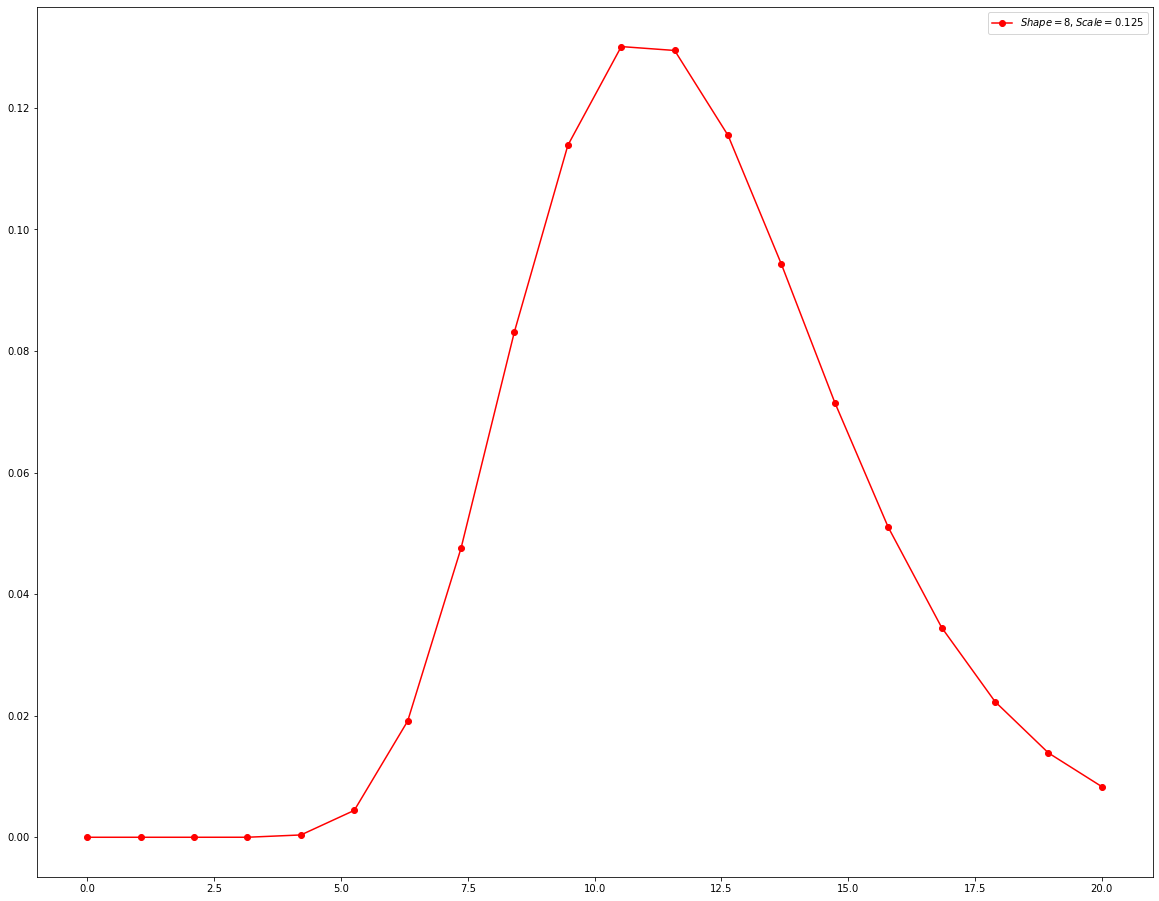

In [164]:
age_shape=10
age_scale=2
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, age_shape, age_scale)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits lengths
#Age_shape*Age_scale=age_average_x=20

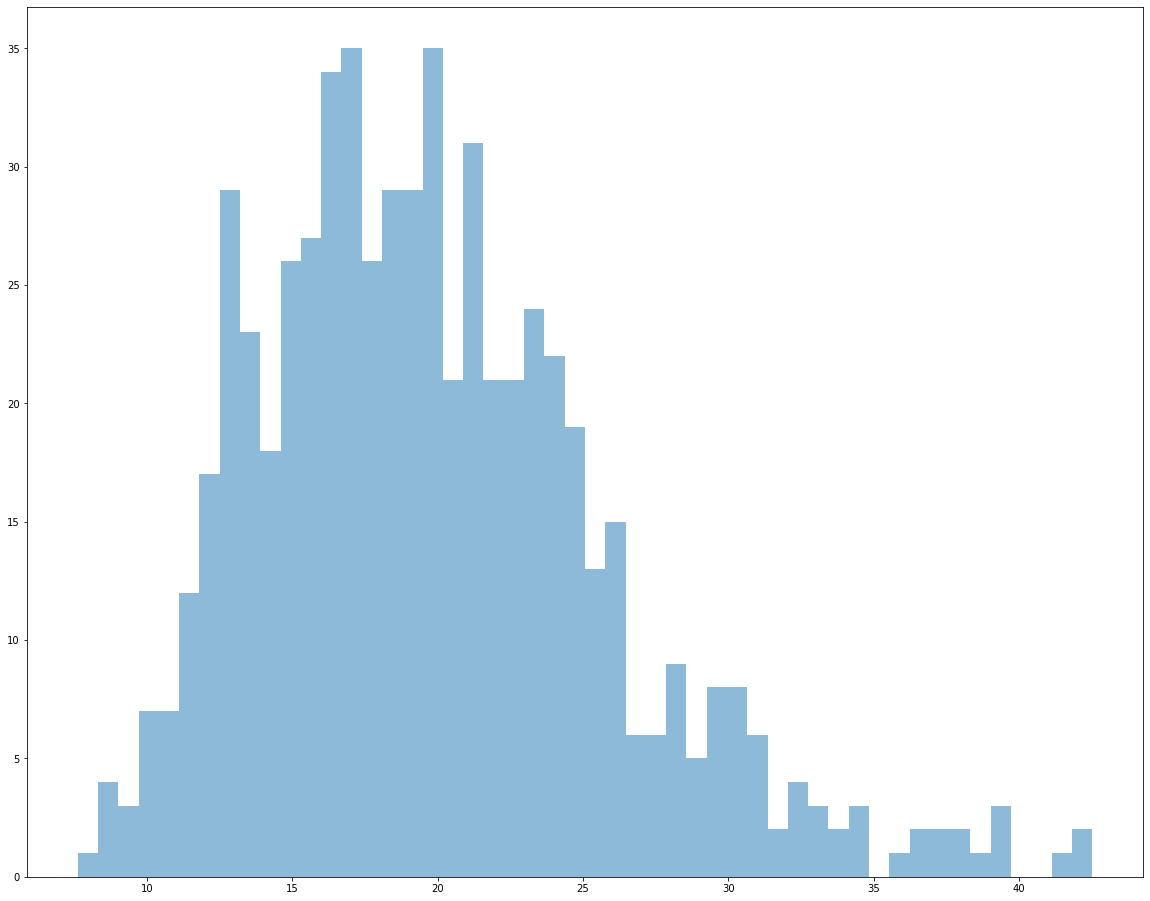

[17.473373   14.45082381 23.84370267 20.75936135 10.08363629 13.67564593
 15.29001546 18.99246242 14.61495058 16.63113324 22.47603201 27.3388783
  9.76174694 24.74132128 26.88874274 15.38507851 42.07880054 16.34753466
 20.62823868 29.3425929  15.90043532 23.28912211 30.91417565  8.929411
 14.92824022  9.58971763 14.660303   13.17663852 15.91083434 24.85969455
 29.8967769  20.90327064 13.05525559 10.07368377 13.3873985  26.70794747
 15.53116849 19.00189685 12.73756315 14.97709194 30.51268472 24.75526841
 16.41746884 35.84223488 15.21266652 13.45050973 16.97136618 20.48232801
 26.78825476 10.98812666 25.54808074 21.28407486 14.43766524 23.99465323
 22.92713218 19.27169446 22.16719213 17.61694156 22.70442325 22.36737396
 23.79374878 10.32388512 30.80925254  9.37536549 23.5773362  20.96542892
 19.18209779 30.73516224 11.28501294 10.96929503 14.73720991 15.15599106
 32.01017794 21.08827333 13.5411855  13.88588599 24.61102295 16.29617116
 15.64974029 18.08059908 15.58400372 12.20798197 13.20

In [165]:
age=np.random.gamma(age_shape,age_scale,number_circuit)
plt.hist(np.random.gamma(age_shape,age_scale,number_circuit),alpha=0.5,bins=50)
plt.show()
print (age)
#Randomly determined circuit's ages in the base year

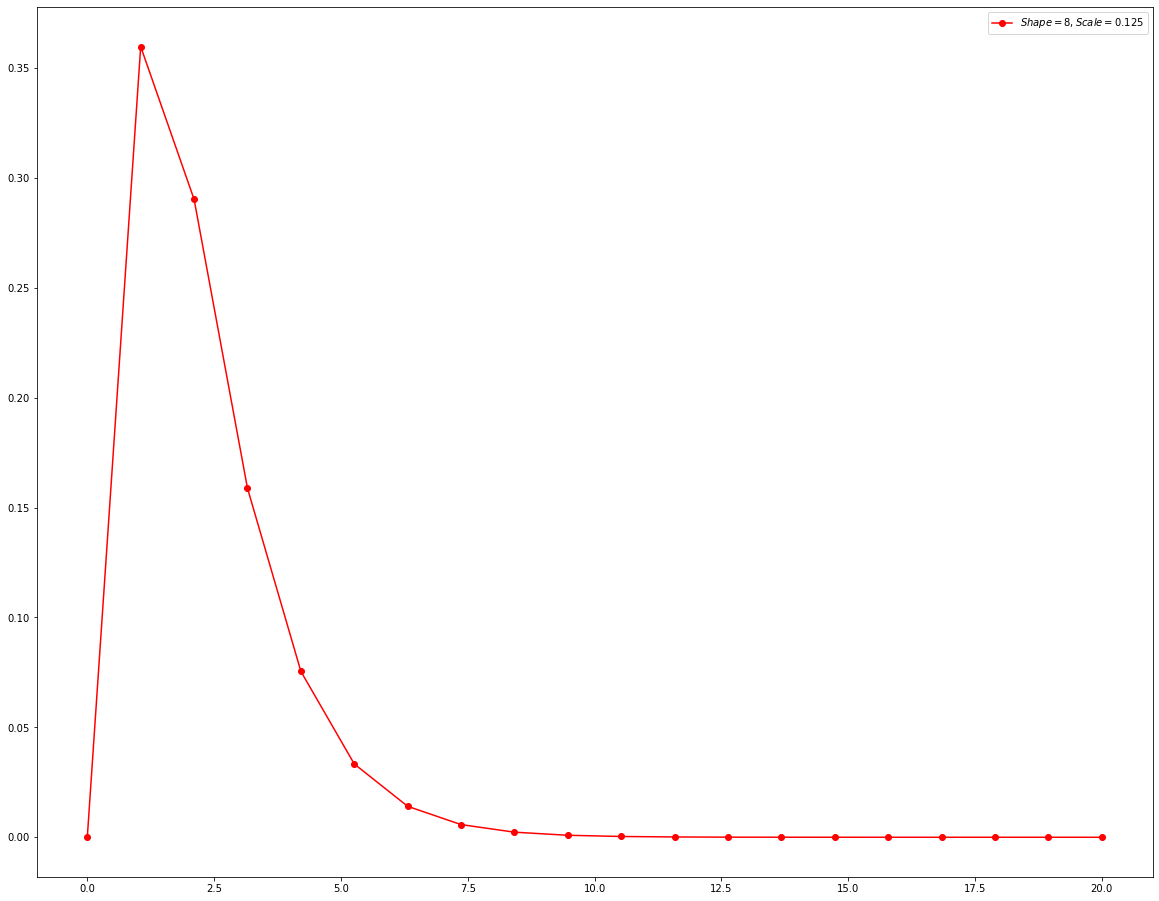

In [166]:
length_shape=2
length_scale=0.25
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, length_shape, length_scale)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits lengths
#length_shape*length_scale=length_average_x=0.5

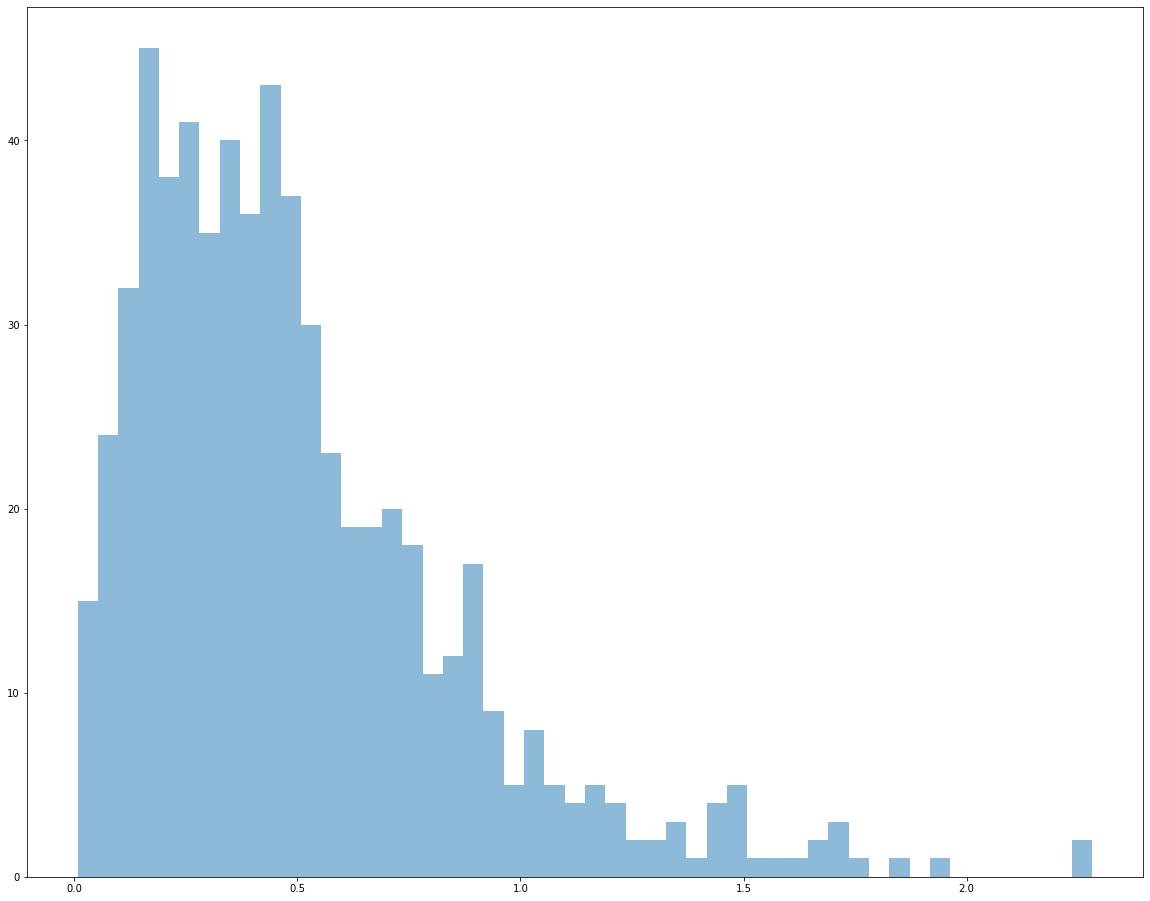

[0.78640835 0.25931959 0.75386424 0.05857355 0.38199804 0.99375689
 0.29640432 1.59900016 0.27296318 0.45213599 0.29784969 0.31854903
 0.89177115 1.24987941 0.52778378 0.42236681 0.89133765 0.21536186
 0.1277372  0.41689536 0.11903725 0.30217793 0.56576393 1.29371976
 0.59987717 0.07175364 1.03561374 0.21475694 0.06338272 0.6979385
 0.26717513 0.35418128 0.24533494 0.69633249 1.03677557 0.14096321
 0.24694903 0.33298405 0.76079411 0.57685669 0.87505829 0.17799482
 0.56230103 0.33465567 0.42889256 0.18565812 0.52248812 0.41468885
 0.55533308 0.15693353 0.61491602 0.1160849  0.33333274 0.45698655
 0.0365688  0.2808458  0.50882915 1.53503045 0.03643743 1.15365164
 0.27307633 0.2220952  0.3196396  0.15953106 0.32632345 0.25849252
 0.06974853 0.83060437 0.43387004 1.24749618 0.33531762 0.05107232
 0.3486826  1.09053312 0.6556573  0.30940555 1.03521743 0.09415803
 0.50834171 0.43987322 0.35683327 0.82998383 1.40083141 0.25007314
 0.49077673 0.79828406 0.4422807  0.22201117 0.81731432 0.11825

In [167]:
length=np.random.gamma(length_shape,length_scale,number_circuit)
plt.hist(np.random.gamma(length_shape,length_scale,number_circuit),alpha=0.5,bins=50)
plt.show()
print (length)
#Randomly determined circuit's ages in the base year

In [168]:
#Defining Line segment class with a new approach: the class just covers the StatusQuo strategy methods and these methods are going to be changed based on requirements for other strategies in the simulations.
class Line_segment_statusQuo:
    ## The __init__ function is the constructor
    def __init__(self, age_shape, age_scale, length_shape, length_scale, overhead_proportion):        
        self.age = [np.random.gamma(age_shape, age_scale)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(length_shape,length_scale) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        if self.underground[0]==1:
            self.replcost_rate=[underground_line['replcost']]
        else:
            self.replcost_rate=[overhead_line['replcost']]       
        self.capex=[0]
        self.opex=[self.opex_calculation()]
        
    ###Lifecycle Infrastructure Costs:
    def get_underground_baseyear(self):
        return (self.underground[0])
    # Determining circuit's overhead or underground status in the base years 
    def get_age_baseyear(self):
        return (self.age[0])
    # Determining circuit's age in the base year
    def get_length(self):
        return (self.length)
    # Determining circuit's length
    def add_age(self):
        underground=self.underground[0]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
        else:
            lifespan_x= int(overhead_line['lifespan'])
        age=(self.age[-1])
        if age<(lifespan_x-1):
            age+=1
            self.age.append(age)
            self.underground.append(self.underground[0])
        else:
            self.age.append(1)
            self.underground.append(self.underground[0])
    # Adding one year to the age of circuit, compare it to the lifespan and append this age to age list. Also append underground status to its list.
    def get_underground_array(self):
        return(self.underground)
    # Returning underground list
    def get_age_array(self):
        return(self.age)
    # Returning ages list   
    def add_replcost_intrest_rate(self):
        underground=self.underground[0]
        if underground==1:
            #lifespan_x= int(underground_line['lifespan'])
            #replcost_baseyear=underground_line['replcost']
            replcost_growth_rate_x=underground_line['replcost_growth_rate']
        else:
            #lifespan_x= int(overhead_line['lifespan'])
            #replcost_baseyear=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        replcost_x_new=(self.replcost_rate[-1])+(replcost_growth_rate_x)*(self.replcost_rate[-1])
        self.replcost_rate.append(replcost_x_new)
        return(self.replcost_rate)
    #Adding interest rate to the replacement cost based on a year and also coonsidering different replacementcost rate when underground=1    
    def capex_calculation(self):
        if (self.age[-1])==1:
            length=self.length
            replcost_rate=self.replcost_rate[-1]
            replcost_new=(replcost_rate)*(length)
            self.capex.append(replcost_new)
        else:
            replcost_new=0
            self.capex.append(replcost_new)
        return(self.capex)
    #Determining capital expenses which is replacement cost for each circuit based on the rate of replacement cost in that year and length of the circuit.
    def opex_calculation(self):
        underground=self.underground[0]
        if underground==1:
            om_percentage_replcost=underground_line['om_percentage_replcost']
            #om_growth_rate=underground_line['om_growth_rate']
        else:
            om_percentage_replcost=overhead_line['om_percentage_replcost']
            #om_growth_rate=overhead_line['om_growth_rate']
        length=self.length
        replcost_rate=self.replcost_rate[0]
        opex=(om_percentage_replcost)*(length)*(replcost_rate)
        #opex_new=opex[-1]+om_growth_rate*opex[-1]
        #self.opex.append(opex)
        return(opex)
    def opex_add_interest_rate(self):
        underground=self.underground[0]
        if underground==1:
            om_growth_rate=underground_line['om_growth_rate']
        else:
            om_growth_rate=overhead_line['om_growth_rate']
        opex_new=self.opex[-1]+(self.opex[-1]*om_growth_rate)
        self.opex.append(opex_new)
        return(self.opex)
    #Determining operation and maintanace expenses which is a fraction of replacement rate for each circuit.
    def get_first_retire(self):
        age_baseyear=self.age[0]
        underground=self.underground[0]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
        elif underground==1:
            lifespan_x=underground_line['lifespan']
        first_retire=(lifespan_x)-(age_baseyear)
        return (np.ceil (first_retire))
    #Determining the first retirement year
 
    ###Environmental Costs:
    def environmental_restoration_calculation(self):
        if self.underground[0]==0:
            corridor_length=overhead_line['corridor_length']
        else:
            corridor_length=underground_line['corridor_length']
        return((self.length)*(corridor_length)*640/5280*easment_value)
    #Determining environmental restoration costs based on the length of overhead and underground lines. (1mile= 5280 foot, 1sqmile=640 Acre) 
    
    ###Safety and health Costs:
    def non_fatal_cost(self):
        return(nfir*employees/100000*injurycost)
    def fatal_cost(self):
        return(fir*employees/100000*vsl)

In [182]:
###generating important cost results for statusQuo strategy in a data frame
circuit_list=[]
capex=[0 for t in range (40)]
opex=[0 for t in range (40)]
underground_length_new=[0 for t in range (40)]
underground_length_total=[0 for t in range (40)]
environmental_restoration_cost=[0 for t in range (40)]
underground_rate=[]
for i in range (number_circuit):
    circuit=Line_segment_statusQuo(age_shape, age_scale, length_shape, length_scale, 0.66)
    circuit_list.append(circuit)
    underground_length_total[0]+=circuit_list[i].underground[0]
#print(circuit_list)
for t in range (40):
    for i in range (len(circuit_list)):
        circuit_list[i].add_age()
        circuit_list[i].add_replcost_intrest_rate()
        circuit_list[i].capex_calculation()
        circuit_list[i].opex_calculation()
        circuit_list[i].opex_add_interest_rate()
        circuit_list[i].environmental_restoration_calculation()
        capex[t]+=circuit_list[i].capex[t]
        opex[t]+=circuit_list[i].opex[t]
#print(underground_length_total)
#Determining future total new underground line mileage
#print(capex)
#print(opex)
Lifecycle_infrastructure_cost=[0 for t in range (40)]
for t in range (40):
    Lifecycle_infrastructure_cost[t]=Lifecycle_infrastructure_cost[t]+capex[t]+opex[t]
#print(Lifecycle_infrastructure_cost)
#print(environmental_restoration_cost)
# generating total new underground lengths in t from 1 to 100.
# generating associated opex and capex and total lifecycle infrastructure costs for all line segments in t from 1 to 100 (t can change to any number). 
# generating associated environmental cost due to developing new underground lines
#environmental_restoration_cost=[circuit_list[0].environmental_restoration_calculation() for t in range (40)]
environmental_restoration_cost=[0 for t in range (40)]
#print(environmental_restoration_cost)
non_fatal_cost=[circuit_list[0].non_fatal_cost() for t in range (40)]
fatal_cost=[circuit_list[0].fatal_cost() for t in range (40)]
total_safety_cost=[0 for t in range (40)]
for t in range (40):
    total_safety_cost[t]=non_fatal_cost[t]+fatal_cost[t]
#print(non_fatal_cost)
#print(fatal_cost)
#print(total_safety_cost)
total_undergrounding_cost=[0 for t in range (40)]
for t in range (40):
    total_undergrounding_cost[t]+=Lifecycle_infrastructure_cost[t]+environmental_restoration_cost[t]+total_safety_cost[t]
#print(total_undergrounding_cost)
df_cost_statusQuo=pd.DataFrame([range(40), underground_length_total,capex,opex,Lifecycle_infrastructure_cost,environmental_restoration_cost,non_fatal_cost,fatal_cost,total_safety_cost,total_undergrounding_cost]).transpose()
df_cost_statusQuo.columns=['year','total underground length','capex','opex','Lifecycle infrastructure cost','environmental restoration cost','non fatal cost','fatal cost','total safety cost','total undergrounding cost']

In [254]:
df_cost_statusQuo

,year,total underground length,capex,opex,Lifecycle infrastructure cost,environmental restoration cost,non fatal cost,fatal cost,total safety cost,total undergrounding cost
0,0.0,200.0,0.000000e+00,2.895257e+05,2.895257e+05,0.0,91611.240988,34556.823529,126168.064518,4.156938e+05
1,1.0,0.0,4.192769e+05,3.040020e+05,7.232789e+05,0.0,91611.240988,34556.823529,126168.064518,8.494470e+05
2,2.0,0.0,0.000000e+00,3.192021e+05,3.192021e+05,0.0,91611.240988,34556.823529,126168.064518,4.453702e+05
3,3.0,0.0,1.797203e+05,3.351622e+05,5.148825e+05,0.0,91611.240988,34556.823529,126168.064518,6.410505e+05
4,4.0,0.0,0.000000e+00,3.519203e+05,3.519203e+05,0.0,91611.240988,34556.823529,126168.064518,4.780884e+05
5,5.0,0.0,2.971972e+05,3.695163e+05,6.667135e+05,0.0,91611.240988,34556.823529,126168.064518,7.928816e+05
6,6.0,0.0,1.998212e+05,3.879922e+05,5.878133e+05,0.0,91611.240988,34556.823529,126168.064518,7.139814e+05
7,7.0,0.0,0.000000e+00,4.073918e+05,4.073918e+05,0.0,91611.240988,34556.823529,126168.064518,5.335598e+05
8,8.0,0.0,8.594796e+04,4.277614e+05,5.137093e+05,0.0,91611.240988,34556.823529,126168.064518,6.398774e+05
9,9.0,0.0,4.221838e+05,4.491494e+05,8.713332e+05,0.0,91611.240988,34556.823529,126168.064518,9.975013e+05


In [258]:
df_cost_statusQuo['Lifecycle infrastructure cost'].sum()

79416534.0067232

In [260]:
df_cost_statusQuo['environmental restoration cost'].sum()

0.0

In [268]:
df_cost_statusQuo['total safety cost'].sum()

5046722.580705882

In [262]:
df_cost_statusQuo['total undergrounding cost'].sum()

84463256.58742908

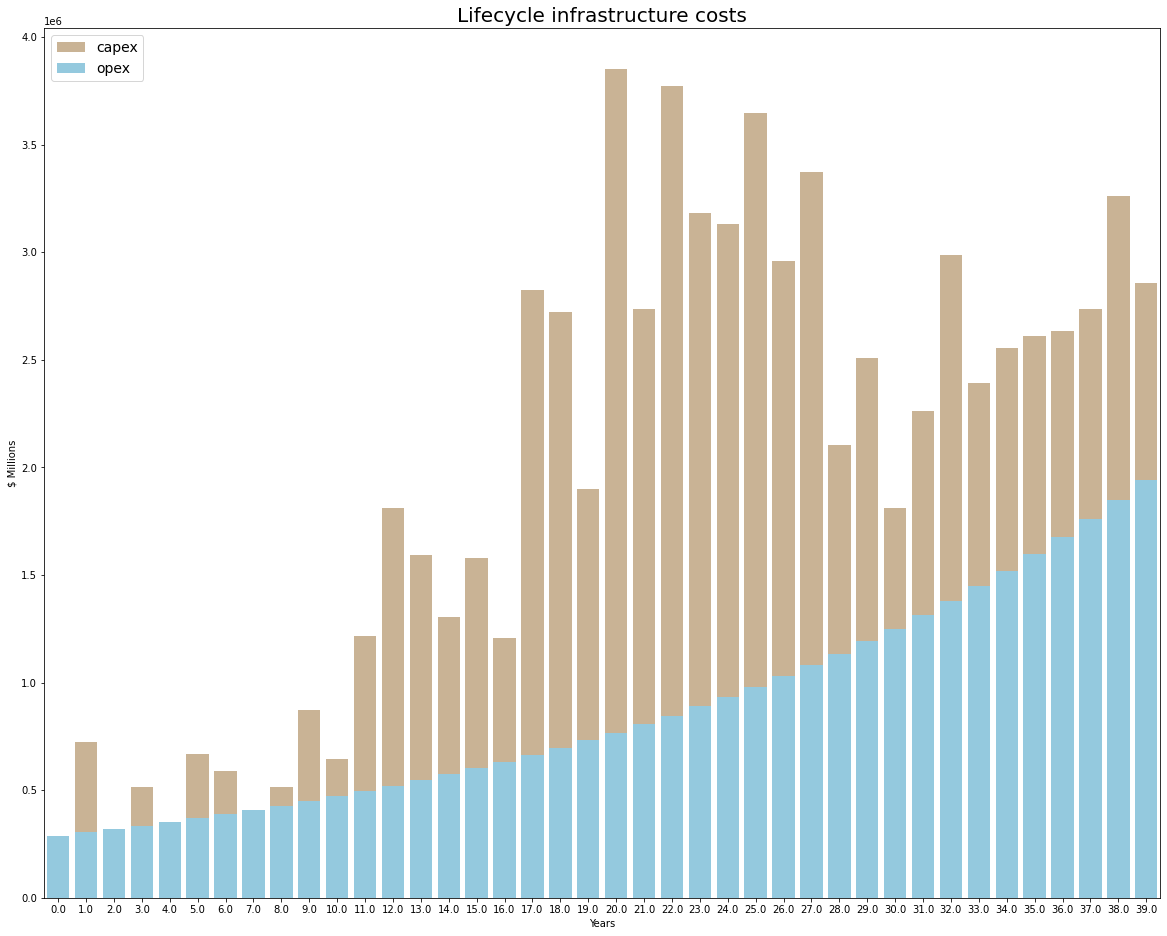

In [264]:
s_capex = sns.barplot(x='year', y='Lifecycle infrastructure cost', data = df_cost_statusQuo, color = 'tan', label="capex")
s_opex = sns.barplot(x ='year', y ='opex', data = df_cost_statusQuo, color = 'skyblue', label='opex')
plt.ylabel('$ Millions')
plt.xlabel('Years')
plt.title('Lifecycle infrastructure costs', loc ='center',fontsize=20)
plt.legend(loc='upper left',fontsize=14)

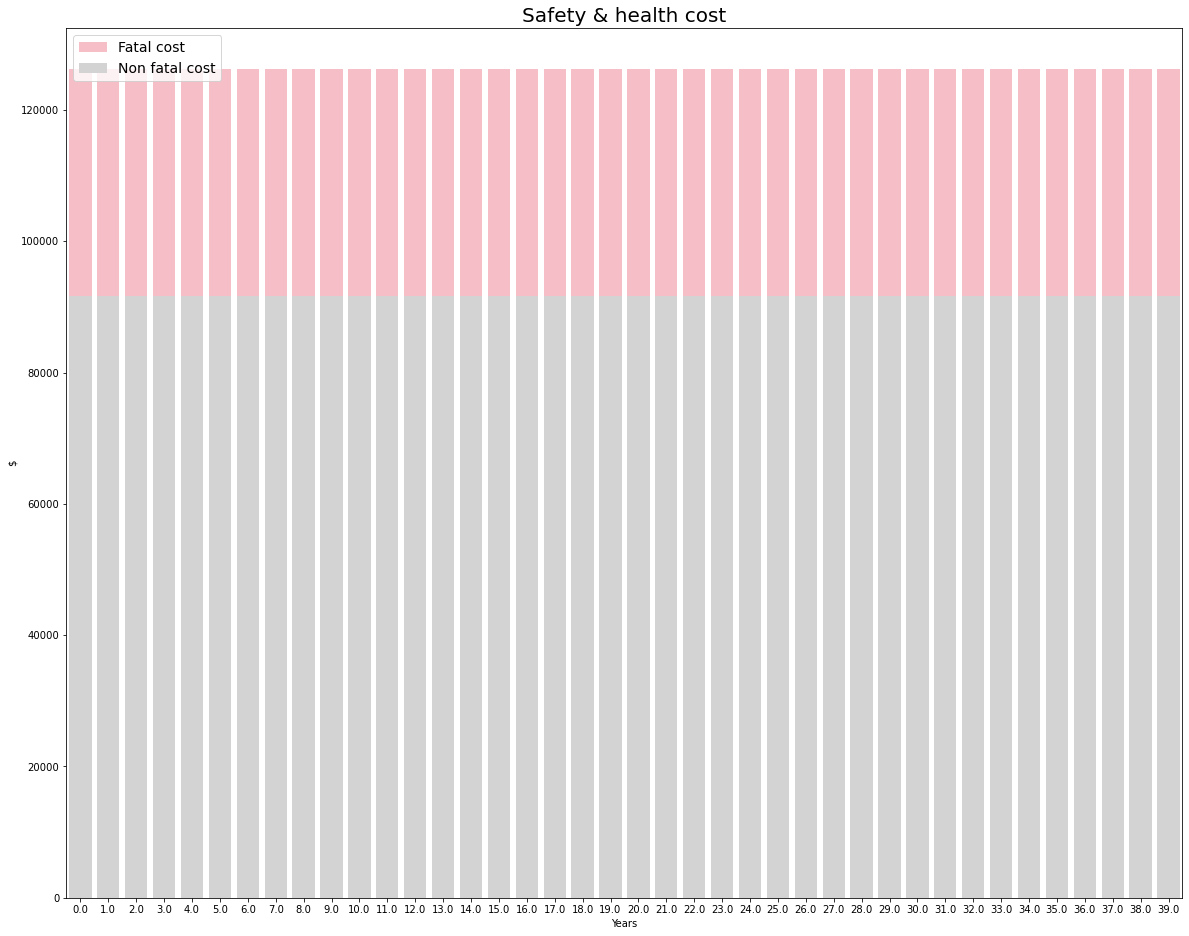

In [266]:
s_fatal_cost = sns.barplot(x='year', y='total safety cost', data = df_cost_statusQuo, color = 'lightpink', label="Fatal cost")
s_non_fatal_cost = sns.barplot(x ='year', y ='non fatal cost', data = df_cost_statusQuo, color = 'lightgray', label='Non fatal cost')
plt.ylabel('$')
plt.xlabel('Years')
plt.title('Safety & health cost', loc ='center',fontsize=20)
plt.legend(loc='upper left',fontsize=14)

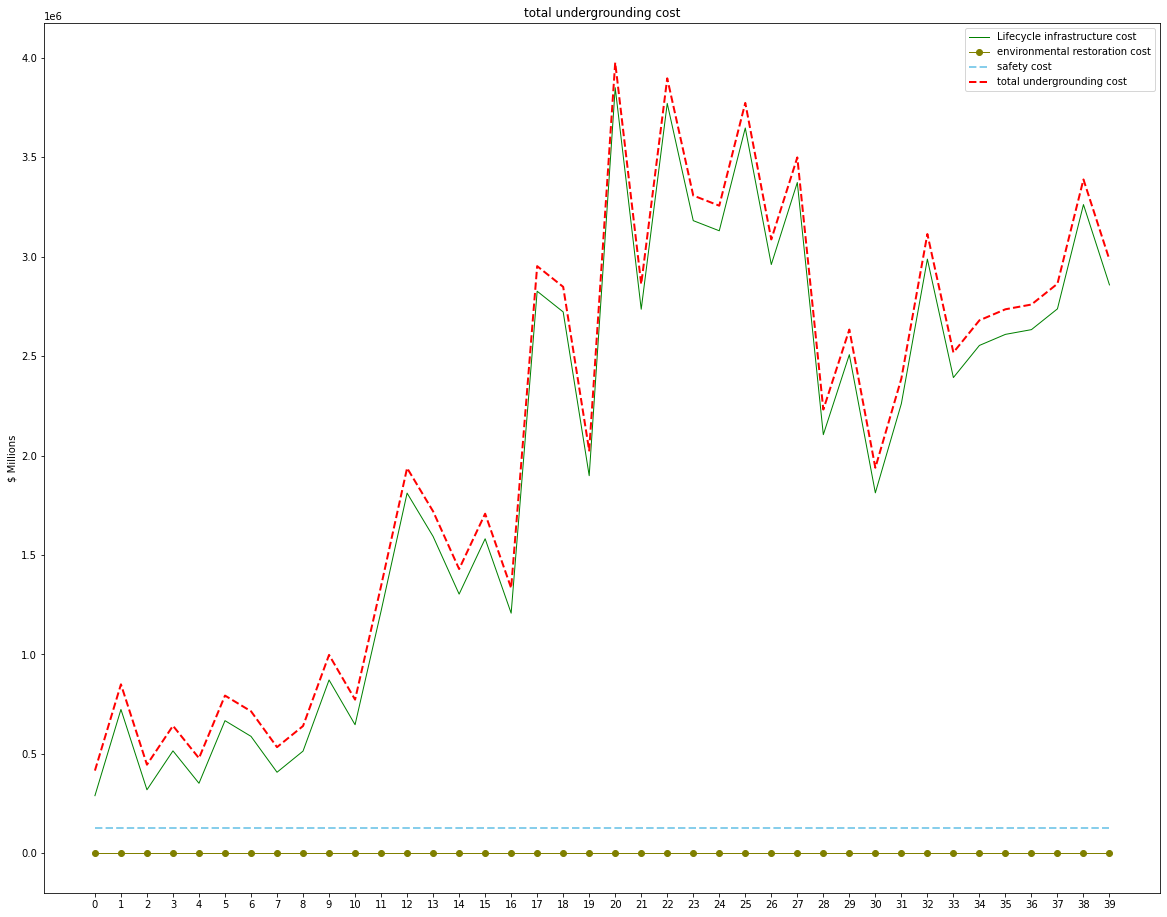

In [267]:
# multiple line plots
plt.plot( 'year', 'Lifecycle infrastructure cost', data=df_cost_statusQuo, marker='', markerfacecolor='green', markersize=4, color='green', linewidth=1)
plt.plot( 'year', 'environmental restoration cost', data=df_cost_statusQuo, marker='o', color='olive', linewidth=1)
plt.plot( 'year', 'total safety cost', data=df_cost_statusQuo, marker='', color='skyblue', linewidth=2, linestyle='dashed', label="safety cost")
plt.plot( 'year', 'total undergrounding cost', data=df_cost_statusQuo, marker='', color='red', linewidth=2, linestyle='dashed', label="total undergrounding cost")
plt.ylabel('$ Millions')
plt.xticks(x, df_cost.index)
plt.title('total undergrounding cost', loc='center')
# show legend
plt.legend()

# show graph
plt.show()

In [185]:
#Defining Line segment class with a new dynamic approach
class Line_segment_undergrounding_after_lifespan:
    ## The __init__ function is the constructor
    def __init__(self, age_shape, age_scale, length_shape, length_scale, overhead_proportion):        
        self.age = [np.random.gamma(age_shape, age_scale)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(length_shape,length_scale) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        #self.replcost_rate=self.set_replcost_rate_array
        if self.underground[0]==1:
            self.replcost_rate=[underground_line['replcost']]
        else:
            self.replcost_rate=[overhead_line['replcost']]       
        self.capex=[0]
        #self.opex=[0]
        self.opex=[self.opex_calculation()]
        self.underground_length_new=[0]
        #if self.underground[0]==1:
            #self.underground_length_new=[self.length]
        #else:
            #self.underground_length_new=[0]
        self.environmental_restoration=[0]
        self.underground_total=[0]
        
    ###Lifecycle Infrastructure Costs:
    def get_underground_baseyear(self):
        return (self.underground[0])
    # Determining circuit's overhead or underground status in the base years 
    def get_age_baseyear(self):
        return (self.age[0])
    # Determining circuit's age in the base year
    def get_length(self):
        return (self.length)
    # Determining circuit's length
    def add_age(self):
        underground=self.underground[-1]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
        else:
            lifespan_x= int(overhead_line['lifespan'])
        age=(self.age[-1])
        if age<(lifespan_x-1):
            age+=1
            self.age.append(age)
            self.underground.append(self.underground[-1])
        else:
            self.age.append(1)
            self.underground.append(1)
    # Adding one year to the age of circuit, compare it to the lifespan and append this age to age list. Also append underground status to its list.
    def get_underground_array(self):
        return(self.underground)
    # Returning underground list
    def get_age_array(self):
        return(self.age)
    # Returning ages list   
    def add_replcost_intrest_rate(self):
        underground=self.underground[-1]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
            replcost_baseyear=underground_line['replcost']
            replcost_growth_rate_x=underground_line['replcost_growth_rate']
        else:
            lifespan_x= int(overhead_line['lifespan'])
            replcost_baseyear=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        if (self.age[-1])==1:
            replcost_x_new=underground_line['replcost']*((1+replcost_growth_rate_x)**(len(self.age)-1))
            self.replcost_rate.append(replcost_x_new)
        else:
            replcost_x_new=(self.replcost_rate[-1])+(replcost_growth_rate_x)*(self.replcost_rate[-1])
            self.replcost_rate.append(replcost_x_new)
        return(self.replcost_rate)
    #Adding interest rate to the replacement cost based on a year and also coonsidering different replacementcost rate when underground=1    
    def capex_calculation(self):
        if (self.age[-1])==1:
            length=self.length
            replcost_rate=self.replcost_rate[-1]
            replcost_new=(replcost_rate)*(length)
            self.capex.append(replcost_new)
        else:
            replcost_new=0
            self.capex.append(replcost_new)
        return(self.capex)
    #Determining capital expenses which is replacement cost for each circuit based on the rate of replacement cost in that year and length of the circuit.
    #def opex_calculation(self):
        #underground=self.underground[-1]
        #if underground==1:
            #om_percentage_replcost=underground_line['om_percentage_replcost']
        #else:
            #om_percentage_replcost=overhead_line['om_percentage_replcost']
        #length=self.length
        #replcost_rate=self.replcost_rate[-1]
        #opex_new=(om_percentage_replcost)*(length)*(replcost_rate)
        #self.opex.append(opex_new)
        #return(self.opex)
    #Determining operation and maintanace expenses which is a fraction of replacement rate for each circuit.
    def opex_calculation(self):
        underground=self.underground[0]
        if underground==1:
            om_percentage_replcost=underground_line['om_percentage_replcost']
            #om_growth_rate=underground_line['om_growth_rate']
        else:
            om_percentage_replcost=overhead_line['om_percentage_replcost']
            #om_growth_rate=overhead_line['om_growth_rate']
        length=self.length
        replcost_rate=self.replcost_rate[0]
        opex=(om_percentage_replcost)*(length)*(replcost_rate)
        #opex_new=opex[-1]+om_growth_rate*opex[-1]
        #self.opex.append(opex)
        return(opex)
    def opex_add_interest_rate(self):
        underground=self.underground[0]
        if underground==1:
            om_growth_rate=underground_line['om_growth_rate']
        else:
            om_growth_rate=overhead_line['om_growth_rate']
        opex_new=self.opex[-1]+(self.opex[-1]*om_growth_rate)
        self.opex.append(opex_new)
        return(self.opex)
    def get_first_retire(self):
        age_baseyear=self.age[0]
        underground=self.underground[0]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
        elif underground==1:
            lifespan_x=underground_line['lifespan']
        first_retire=(lifespan_x)-(age_baseyear)
        return (np.ceil (first_retire))
    #Determining the first retirement year Under the undergrounding alternative
    def underground_length_new_array(self):
        first_retire=self.get_first_retire()
        length=self.length
        if self.underground[0]==0:
            if 0<first_retire-(self.age[-1])<1:
                self.underground_length_new.append(length)
            else:
                self.underground_length_new.append(0)
        if self.underground[0]==1:
            self.underground_length_new.append(0)
        return(self.underground_length_new)
    #Determining future annual underground line mileage
    def underground_length_total_array(self):
        first_retire=self.get_first_retire()
        length=self.length
        if self.underground[0]==0:
            if 0<first_retire-(self.age[-1])<1:
                self.underground_length_new.append(length)
            else:
                self.underground_length_new.append(0)
        if self.underground[0]==1:
            self.underground_length_new.append(0)
        return(self.underground_length_new)
    #Determining future annual new underground line mileage
      
    
    ###Environmental Costs:
    def environmental_restoration_calculation(self):
        #if self.underground[0]==0:
            #corridor_length=overhead_line['corridor_length']
        #else:
            #corridor_length=underground_line['corridor_length']
        self.environmental_restoration.append(+(self.underground_length_new[-1])*(underground_line['corridor_length']-overhead_line['corridor_length'])*640/5280*easment_value)
        return(self.environmental_restoration)
    #Determining environmental restoration costs based on the length of new underground lines. (1mile= 5280 foot, 1sqmile=640 Acre) 
    
    ###Safety and health Costs:
    def non_fatal_cost(self):
        return(nfir*employees/100000*injurycost)
    def fatal_cost(self):
        return(fir*employees/100000*vsl)
        

In [186]:
###generating important cost results
circuit_list_new=[]
capex=[0 for t in range (40)]
opex=[0 for t in range (40)]
underground_length_new=[0 for t in range (40)]
underground_length_total=[0 for t in range (40)]
environmental_restoration_cost=[0 for t in range (40)]
underground_rate=[]
for i in range (number_circuit):
    circuit=Line_segment_undergrounding_after_lifespan(age_shape, age_scale, length_shape, length_scale, 0.66)
    circuit_list_new.append(circuit)
    underground_length_total[0]+=circuit_list_new[i].underground[0]
#print(circuit_list)
for t in range (40):
    for i in range (len(circuit_list)):
        circuit_list_new[i].add_age()
        circuit_list_new[i].add_replcost_intrest_rate()
        circuit_list_new[i].capex_calculation()
        circuit_list_new[i].opex_calculation()
        circuit_list_new[i].opex_add_interest_rate()
        circuit_list_new[i].underground_length_new_array()
        underground_length_total[t]+=circuit_list_new[i].underground_length_new[t]
        circuit_list_new[i].environmental_restoration_calculation()
        capex[t]+=circuit_list_new[i].capex[t]
        opex[t]+=circuit_list_new[i].opex[t]
        underground_length_new[t]+=circuit_list_new[i].underground_length_new[t]
        environmental_restoration_cost[t]+=circuit_list_new[i].environmental_restoration[t]
    underground_length_total[t]+=underground_length_total[t-1]
    if underground_length_total[t-1]==0:
        underground_rate.append(1)
    else:
        underground_rate.append(underground_length_total[t]/underground_length_total[t-1])
#print(underground_length_new)
#print(underground_length_total)
#Determining future total new underground line mileage
#print(underground_rate)
#Determining rate change in underground, needed to calculate safety and health costs
#print(capex)
#print(opex)
Lifecycle_infrastructure_cost=[0 for t in range (40)]
for t in range (40):
    Lifecycle_infrastructure_cost[t]=Lifecycle_infrastructure_cost[t]+capex[t]+opex[t]
#print(Lifecycle_infrastructure_cost)
#print(environmental_restoration_cost)
# generating total new underground lengths in t from 1 to 100.
# generating associated opex and capex and total lifecycle infrastructure costs for all line segments in t from 1 to 100 (t can change to any number). 
# generating associated environmental cost due to developing new underground lines
non_fatal_cost=[0 for t in range (40)]
fatal_cost=[0 for t in range (40)]
total_safety_cost=[0 for t in range (40)]
for t in range (40):
    non_fatal_cost[t]+=underground_rate[t]*circuit_list_new[0].non_fatal_cost()
    fatal_cost[t]+=underground_rate[t]*circuit_list_new[0].fatal_cost()
    total_safety_cost[t]=non_fatal_cost[t]+fatal_cost[t]
#print(non_fatal_cost)
#print(fatal_cost)
#print(total_safety_cost)
total_undergrounding_cost=[0 for t in range (40)]
for t in range (40):
    total_undergrounding_cost[t]+=Lifecycle_infrastructure_cost[t]+environmental_restoration_cost[t]+total_safety_cost[t]
#print(total_undergrounding_cost)
df_cost_undergrounding=pd.DataFrame([range(40),underground_length_new, underground_length_total,capex,opex,Lifecycle_infrastructure_cost,environmental_restoration_cost,non_fatal_cost,fatal_cost,total_safety_cost,total_undergrounding_cost]).transpose()
df_cost_undergrounding.columns=['year','new underground length','total underground length','capex','opex','Lifecycle infrastructure cost','environmental restoration cost','non fatal cost','fatal cost','total safety cost','total undergrounding cost']


In [187]:
df_cost_undergrounding

,year,new underground length,total underground length,capex,opex,Lifecycle infrastructure cost,environmental restoration cost,non fatal cost,fatal cost,total safety cost,total undergrounding cost
0,0.0,0.000000,215.000000,0.000000e+00,2.945359e+05,2.945359e+05,0.000000,91611.240988,34556.823529,126168.064518,4.207040e+05
1,1.0,2.543764,217.543764,1.552316e+05,3.092627e+05,4.644943e+05,55500.311522,92695.135883,34965.681265,127660.817148,6.476554e+05
2,2.0,0.000000,217.543764,1.666895e+05,3.247258e+05,4.914153e+05,0.000000,91611.240988,34556.823529,126168.064518,6.175834e+05
3,3.0,4.008326,221.552090,4.207889e+05,3.409621e+05,7.617510e+05,87454.378981,93299.212570,35193.546004,128492.758575,9.776982e+05
4,4.0,0.000000,221.552090,6.961203e+04,3.580102e+05,4.276223e+05,0.000000,91611.240988,34556.823529,126168.064518,5.537903e+05
5,5.0,7.690139,229.242229,5.191060e+05,3.759107e+05,8.950167e+05,167784.843119,94791.094288,35756.301106,130547.395394,1.193349e+06
6,6.0,0.000000,229.242229,5.773301e+05,3.947063e+05,9.720364e+05,0.000000,91611.240988,34556.823529,126168.064518,1.098204e+06
7,7.0,6.533286,235.775515,2.449104e+05,4.144416e+05,6.593520e+05,142544.420923,94222.114378,35541.675279,129763.789657,9.316602e+05
8,8.0,0.000000,235.775515,7.318218e+05,4.351637e+05,1.166986e+06,0.000000,91611.240988,34556.823529,126168.064518,1.293154e+06
9,9.0,7.465413,243.240928,6.033909e+05,4.569219e+05,1.060313e+06,162881.743148,94511.948347,35651.004017,130162.952364,1.353357e+06


In [209]:
df_cost_undergrounding['Lifecycle infrastructure cost'].sum()

103111241.14882655

In [211]:
df_cost_undergrounding['environmental restoration cost'].sum()

4117159.9088588255

In [212]:
df_cost_undergrounding['total safety cost'].sum()

5127719.714773387

In [208]:
df_cost_undergrounding['total undergrounding cost'].sum()

112356120.77245876

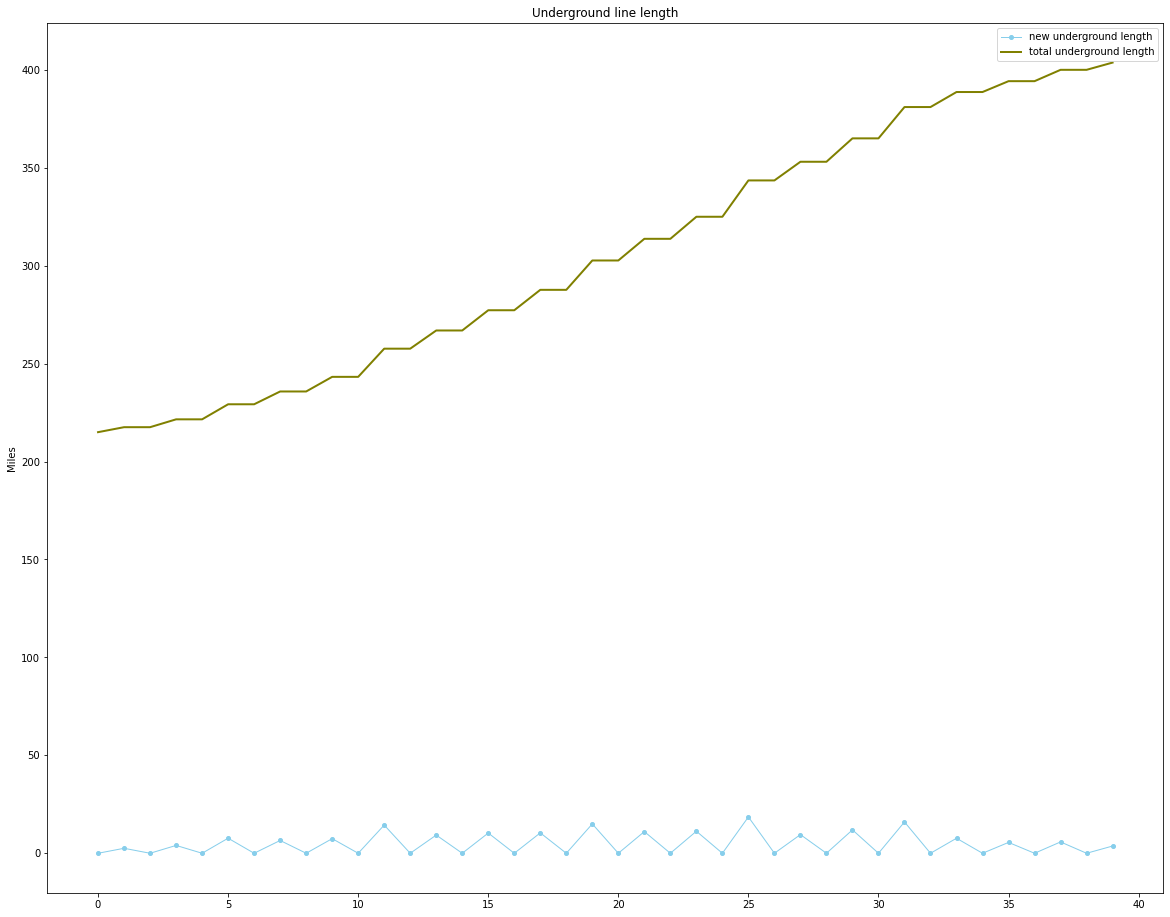

In [214]:
# multiple line plots
plt.plot( 'year', 'new underground length', data=df_cost_undergrounding, marker='o', markerfacecolor='skyblue', markersize=4, color='skyblue', linewidth=1)
plt.plot( 'year', 'total underground length', data=df_cost_undergrounding, marker='', color='olive', linewidth=2)
plt.ylabel('Miles', fontsize=10)
plt.title('Underground line length', loc ='center')
plt.legend()

# show legend
plt.legend()

# show graph
plt.show()

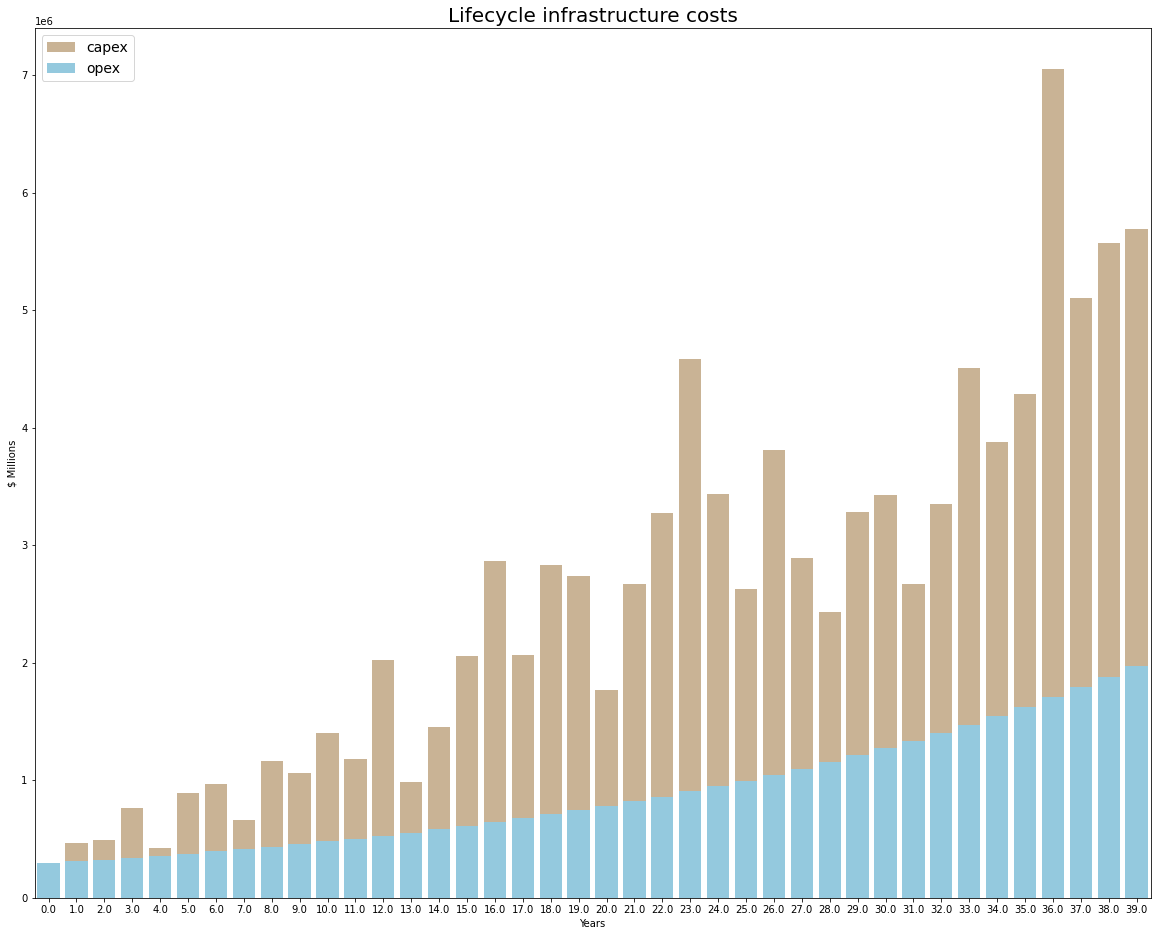

In [235]:
s_capex = sns.barplot(x='year', y='Lifecycle infrastructure cost', data = df_cost_undergrounding, color = 'tan', label="capex")
s_opex = sns.barplot(x ='year', y ='opex', data = df_cost_undergrounding, color = 'skyblue', label='opex')
plt.ylabel('$ Millions')
plt.xlabel('Years')
plt.title('Lifecycle infrastructure costs', loc ='center',fontsize=20)
plt.legend(loc='upper left',fontsize=14)


In [224]:
# multiple line plots
#plt.plot( 'year', 'opex', data=df_cost_undergrounding, marker='o', markerfacecolor='olive', markersize=2, color='olive', linewidth=1)
#plt.plot( 'year', 'capex', data=df_cost_undergrounding, marker='', color='olive', linewidth=2)
#plt.plot( 'year', 'Lifecycle infrastructure cost', data=df_cost_undergrounding, marker='', color='skyblue', linewidth=2, linestyle='dashed', label="Lifecycle infrastructure cost")
#plt.xticks(np.arange(0, 40, 1))
# show legend
#plt.legend()

# show graph
#plt.show()

In [237]:
# define figure
#fig, ax = plt.subplots(1, figsize=(20, 10))
# numerical x
#x = np.arange(0,40)
# plot bars
#plt.bar(x -0.2, df_cost_undergrounding['opex'], width = 0.2, color = '#1D2F6F')
#plt.bar(x -0, df_cost_undergrounding['capex'], width = 0.2, color = '#8390FA')
#plt.bar(x +0.2, df_cost_undergrounding['Lifecycle infrastructure cost'], width = 0.2, color = '#FAC748')
# remove spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
# x y details
#plt.ylabel('$ Millions')
#plt.xticks(x, df_cost.index)
#plt.xlim(0, 40)
# grid lines
#ax.set_axisbelow(True)
#ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
#plt.title('Lifecycle infrastructure costs', loc ='center')
#plt.legend(['opex', 'capex', 'lifecycle infrastructure cost'], loc='upper left', ncol = 3)
#plt.show()

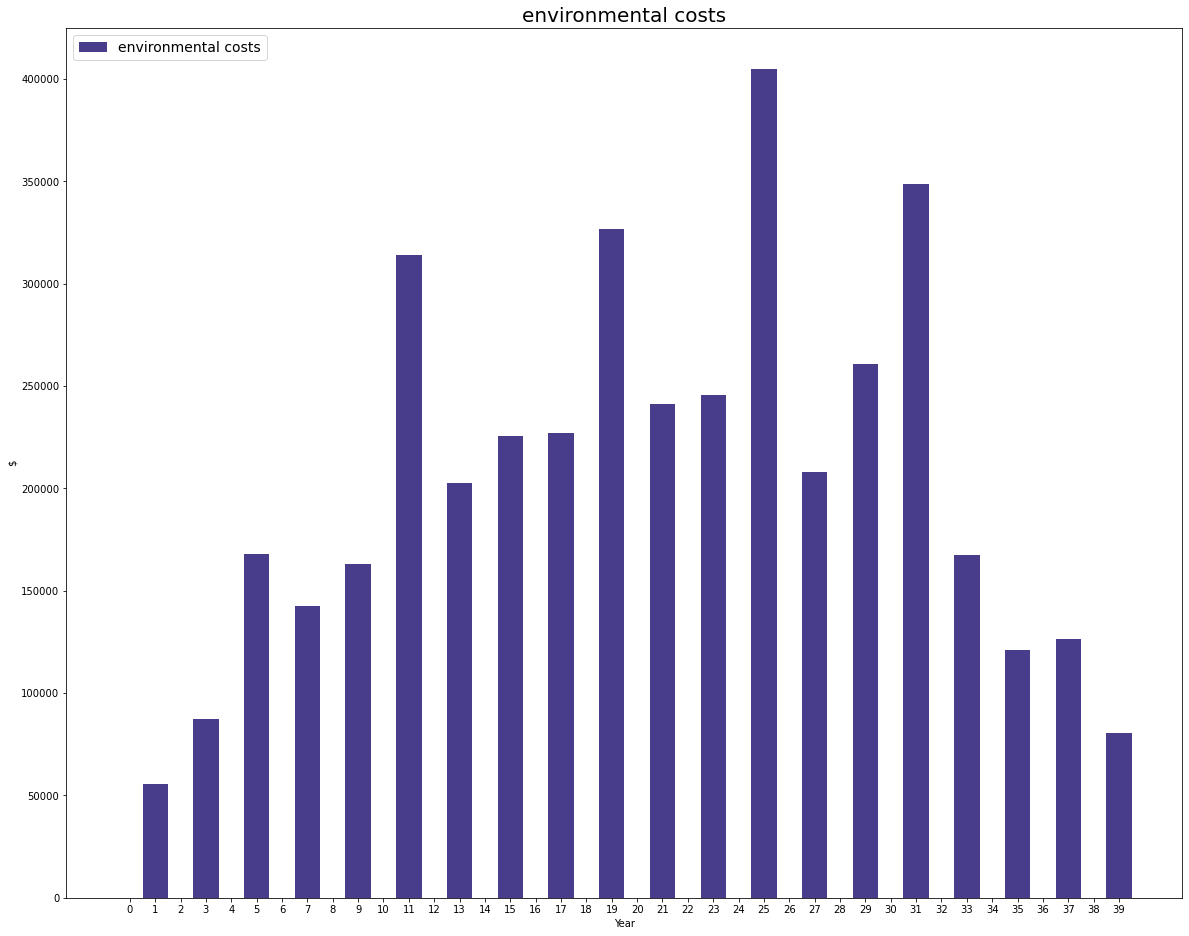

In [244]:
fig1=plt.bar(range(40),df_cost_undergrounding['environmental restoration cost'],align='center',width=1 ,color='darkslateblue',label='environmental costs')
plt.rcParams["figure.figsize"] = (20,16)
plt.xlabel('Year', fontsize=10)
plt.ylabel('$', fontsize=10)
plt.xticks(x, df_cost.index)
plt.title('environmental costs', loc ='center',fontsize=20)
plt.legend(loc='upper left',fontsize=14)
plt.show(fig1)

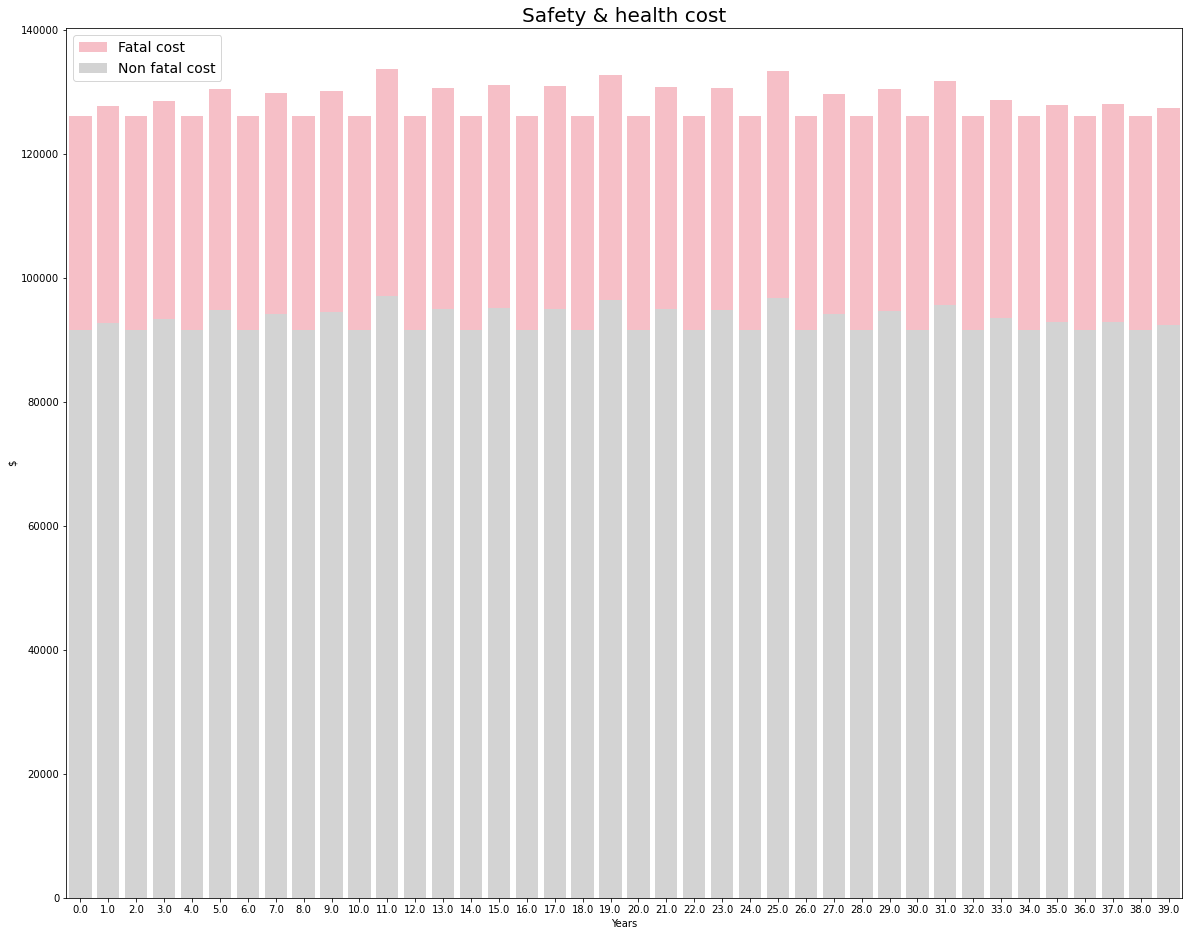

In [251]:
s_fatal_cost = sns.barplot(x='year', y='total safety cost', data = df_cost_undergrounding, color = 'lightpink', label="Fatal cost")
s_non_fatal_cost = sns.barplot(x ='year', y ='non fatal cost', data = df_cost_undergrounding, color = 'lightgray', label='Non fatal cost')
plt.ylabel('$')
plt.xlabel('Years')
plt.title('Safety & health cost', loc ='center',fontsize=20)
plt.legend(loc='upper left',fontsize=14)

In [253]:
# define figure
#fig, ax = plt.subplots(1, figsize=(20, 10))
# numerical x
#x = np.arange(0,40)
# plot bars
#plt.bar(x -0.2, df_cost_undergrounding['non fatal cost'], width = 0.2, color = '#1D2F6F')
#plt.bar(x -0, df_cost_undergrounding['fatal cost'], width = 0.2, color = '#8390FA')
#plt.bar(x +0.2, df_cost_undergrounding['total safety cost'], width = 0.2, color = '#FAC748')
# remove spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
# x y details
#plt.ylabel('$')
#plt.xticks(x, df_cost.index)
#plt.xlim(0, 40)
# grid lines
#ax.set_axisbelow(True)
#ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
#plt.title('Safety and health costs', loc ='center')
#plt.legend(['non fatal cost', 'fatal cost', 'safety and health cost'], loc='upper left', ncol = 3)
#plt.show()

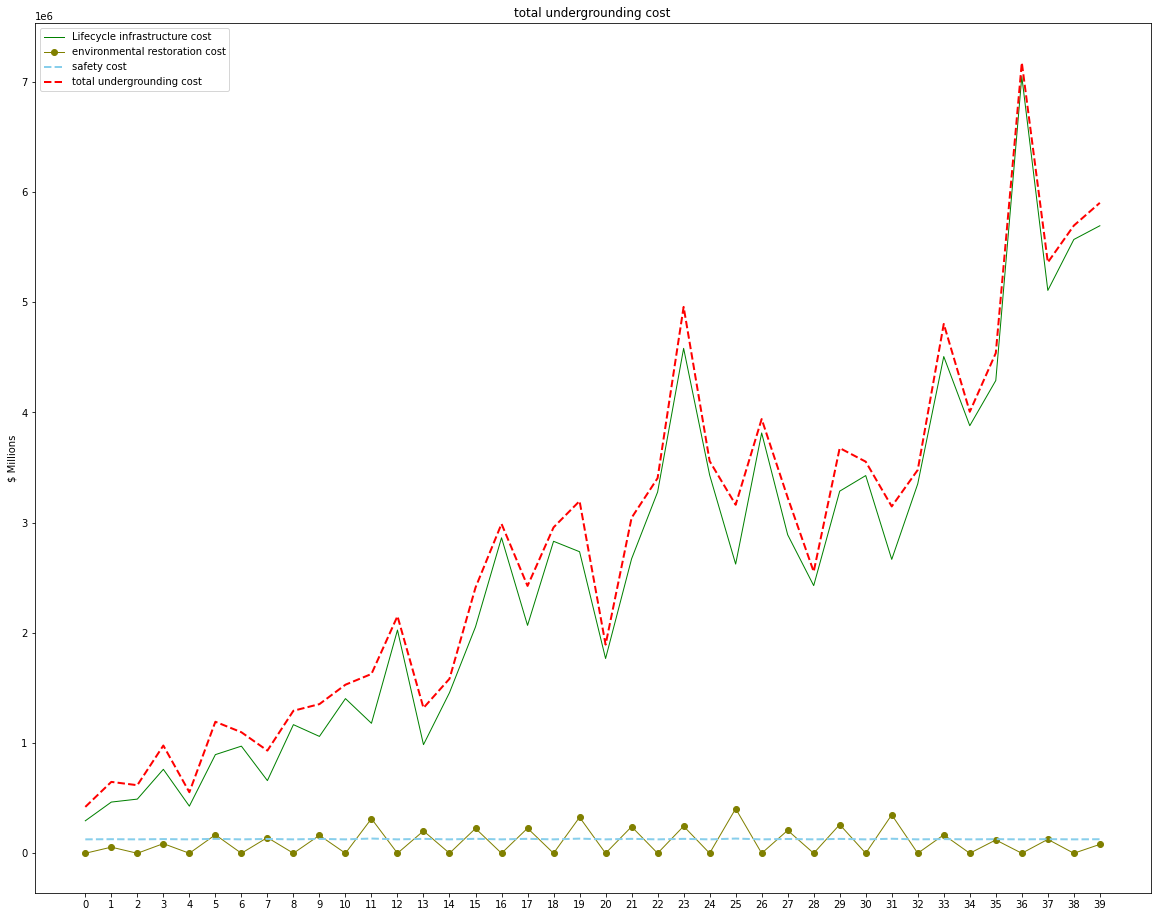

In [204]:
# multiple line plots
plt.plot( 'year', 'Lifecycle infrastructure cost', data=df_cost_undergrounding, marker='', markerfacecolor='green', markersize=4, color='green', linewidth=1)
plt.plot( 'year', 'environmental restoration cost', data=df_cost_undergrounding, marker='o', color='olive', linewidth=1)
plt.plot( 'year', 'total safety cost', data=df_cost_undergrounding, marker='', color='skyblue', linewidth=2, linestyle='dashed', label="safety cost")
plt.plot( 'year', 'total undergrounding cost', data=df_cost_undergrounding, marker='', color='red', linewidth=2, linestyle='dashed', label="total undergrounding cost")
plt.ylabel('$ Millions')
plt.xticks(x, df_cost.index)
plt.title('total undergrounding cost', loc='center')
# show legend
plt.legend()

# show graph
plt.show()

In [197]:
#import pandas as pd
#df_capex=pd.DataFrame(capex_dataframe)
#df_opex=pd.DataFrame(opex_dataframe)
#df_Lifecycle_infrastructure_cost=pd.DataFrame(Lifecycle_infrastructure_cost_dataframe)
#capex_dataframe=capex
#opex_dataframe=opex
#Lifecycle_infrastructure_cost_dataframe=Lifecycle_infrastructure_cost

In [198]:
#df_capex
#df_opex
#df_Lifecycle_infrastructure_cost
#df1=pd.DataFrame.merge(right=df_capex,how='inner', on='df_capex',left_on=df_opex,right_on=df_Lifecycle_infrastructure_cost)

In [199]:
###Testing the results
for i in range (number_circuit):
    circuit_i=Circuit(age_shape, age_scale, length_shape, length_scale, 0.66)
    print(circuit_i.get_underground_baseyear())
    print(circuit_i.get_age_baseyear())
    print(circuit_i.get_length())
    print(circuit_i.get_first_retire())
    for t in range (40):
        circuit_i.add_age()
        circuit_i.add_replcost_intrest_rate()
        circuit_i.capex_calculation()
        circuit_i.opex_calculation()
        circuit_i.underground_length_new_array()
    print(circuit_i.get_underground_array())
    print(circuit_i.get_age_array())
    print(circuit_i.underground_length_new)
    print(circuit_i.replcost_rate)
    print(circuit_i.capex)
    print(circuit_i.opex)
#For each of circuits, 1st number shows its underground status in the baseyear
#2nd number shows its age in the baseyear
#3rd number shows its length 
#4th array shows its underground status in different years
#5th array shows its age in different years
#6th array shows its raplacement_rate in different years (it is just a potential rate using to calculate real numbers in next array)
#7th array shows its raplacement cost in different years
#7th array shows its operation and maitenance cost in different years

0
10.402968536863124
1.311091793142332
50.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[10.402968536863124, 11.402968536863124, 12.402968536863124, 13.402968536863124, 14.402968536863124, 15.402968536863124, 16.402968536863124, 17.402968536863124, 18.402968536863124, 19.402968536863124, 20.402968536863124, 21.402968536863124, 22.402968536863124, 23.402968536863124, 24.402968536863124, 25.402968536863124, 26.402968536863124, 27.402968536863124, 28.402968536863124, 29.402968536863124, 30.402968536863124, 31.402968536863124, 32.40296853686313, 33.40296853686313, 34.40296853686313, 35.40296853686313, 36.40296853686313, 37.40296853686313, 38.40296853686313, 39.40296853686313, 40.40296853686313, 41.40296853686313, 42.40296853686313, 43.40296853686313, 44.40296853686313, 45.40296853686313, 46.40296853686313, 47.40296853686313, 48.40296853686313, 49.40296853686313, 50.40296853686313]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 151750.0392889272, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.750196444636, 758.7

[13.262064564032132, 14.262064564032132, 15.262064564032132, 16.26206456403213, 17.26206456403213, 18.26206456403213, 19.26206456403213, 20.26206456403213, 21.26206456403213, 22.26206456403213, 23.26206456403213, 24.26206456403213, 25.26206456403213, 26.26206456403213, 27.26206456403213, 28.26206456403213, 29.26206456403213, 30.26206456403213, 31.26206456403213, 32.26206456403213, 33.26206456403213, 34.26206456403213, 35.26206456403213, 36.26206456403213, 37.26206456403213, 38.26206456403213, 39.26206456403213, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000, 357000,

[0, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787, 268.04037861849787]
0
28.81182539277496
1.1242793593147484
32.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[28.81182539277496, 29.81182

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
[26.964153001513846, 27.964153001513846, 28.964153001513846, 29.964153001513846, 30.964153001513846, 31.964153001513846, 32.96415300151385, 33.96415300151385, 34.96415300151385, 35.96415300151385, 36.96415300151385, 37.96415300151385, 38.96415300151385, 39.96415300151385, 40.96415300151385, 41.96415300151385, 42.96415300151385, 43.96415300151385, 44.96415300151385, 45.96415300151385, 46.96415300151385, 47.96415300151385, 48.96415300151385, 49.96415300151385, 50.96415300151385, 51.96415300151385, 52.96415300151385, 53.96415300151385, 54.96415300151385, 55.96415300151385, 56.96415300151385, 57.96415300151385, 58.96415300151385, 59.96415300151385, 1, 2, 3, 4, 5, 6, 7]
[0, 0, 0, 0, 0, 0, 0, 0.5645131349301175, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[104000, 104000, 104000, 104000, 104000, 104000, 104000, 1040

In [146]:
###Testing the results
#for i in range (number_circuit):
    #circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
    #for t in range (200):
        #circuit_i.add_age()
    #A=circuit_i.get_underground_array().copy()
    #print(A)
    #print(circuit_i.get_age_array())

In [147]:
###This class was just generated at first to do the calculation based on the formulas in larsen paper and then class segment was developed with a more dynamic approach. 
class Circuit2:
    ## The __init__ function is the constructor
    def __init__(self, age_shape, age_scale, length_shape, length_scale, overhead_proportion):        
        self.age = [np.random.gamma(age_shape, age_scale)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(length_shape,length_scale) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        
###Lifecycle Infrastructure Costs:
    def get_underground(self):
        return (self.underground)
    # Randomly determining status of overhead or underground of circuit
    def get_age_baseyear(self):
        #random.seed(1)
        #self.age= np.random.gamma(shape_age_x, scale_age_x)
        return (self.age)
    # Randomly determining circuit's ages in the base year
    def get_length_baseyear(self):
        #random.seed(1)
        #self.length= np.random.gamma(shape_length_x,scale_length_x)
        return (self.length)
    # Randomly determining circuit's ages in the base year
###Three above methods are defined to identify length, age and overhead or underground, which are three atributes of a circuit.
    
    # def set_lifespan(): # SET lifespan separately
    def get_age_array(self):
        underground= self.underground[-1]
        if underground==0:
            lifespan_x= int(overhead_line['lifespan'])
        elif underground==1:
            lifespan_x= int(underground_line['lifespan'])
        #age_i_baseyear= self.age[0] #self.get_age_baseyear()
        #age_i_t=0
        #age_i_t_array=[]
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            age=(self.age[-1])
            if age<(lifespan_x-1):
                age+=1
                self.age.append(age)
                self.underground.append(self.underground[-1])
            else:
                self.age.append(1)
                self.underground.append(1)
                #age_i_t=(age_i_baseyear)+(t-baseyear)
        return(self.age)    
    def get_current_age(self,t):
        ages_list=self.get_age_array()
        current_age=ages_list[t-baseyear]
        return(current_age)
    # Determining list of circuit's ages based on different ts
    def get_replcost_x_t(self):
        underground= self.underground[-1]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
            replecost_x=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        elif underground==1:
            lifespan_x= underground_line['lifespan']
            replecost_x=underground_line['replcost']
            replcost_growth_rate_x= underground_line['replcost_growth_rate']
        #else:
            #lifespan_x=0
            #replecost_x=0
            #replcost_growth_rate_x=0
        replcost_x_array=[]
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            if t==baseyear:
                replcost_x_t= replecost_x
                replcost_x_array.append(replcost_x_t)
            else:
                replcost_x_t= (replecost_x)+(replcost_growth_rate_x)*(t-baseyear)*(replecost_x)
                replcost_x_array.append(replcost_x_t)
        return (replcost_x_array)
    # Determining list of replacement cost for circuite i from line x based on different ts.
    def get_capex_StatusQuo_i(self): 
        replcost_x=self.get_replcost_x_t()
        age_i=self.get_age_array()
        length=self.length
        capex_StatusQuo_i=0
        capex_StatusQuo_list=[]
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            replcost_x_t= replcost_x[t-baseyear]
            age_i_t=age_i[t-baseyear]
            if age_i_t==1:
                capex_i=((replcost_x_t)*(length))/((1+r)**(t-baseyear))
                capex_StatusQuo_i=(capex_StatusQuo_i)+(capex_i)
                capex_StatusQuo_list.append(capex_StatusQuo_i)
            else:
                capex_StatusQuo_i=0
                capex_StatusQuo_list.append(capex_StatusQuo_i)
        return (sum(capex_StatusQuo_list))
    #Determining list of Status quo capital expenses (CAPEX) occurring in future years (t) when the age of the circuit exceeds the expected useful lifespan
    def get_opex_x_t(self):
        underground= self.underground[-1]
        age_i=self.get_age_array()
        replcost_x=self.get_replcost_x_t()
        if underground==0:
            om_percentage_replcost_x=overhead_line['om_percentage_replcost']
        elif underground==1:
            om_percentage_replcost_x= underground_line['om_percentage_replcost']
        #else:
            #om_percentage_replcost_x=0
        opex_x_t_array=[]
        opex_x_t=0
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            age_i_t=age_i[t-baseyear]
            replcost_x_t=replcost_x[t-baseyear]
            if age_i_t==1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            else:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t=(opex_x_t)+(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            #else:
                #None
        return (opex_x_t_array)
    #Annual operation and maintenance expenses for each line
    def get_opex_StatusQuo_i(self):
        opex_x=self.get_opex_x_t()
        length_i=self.get_length_baseyear()
        opex_StatusQuo_i=0
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            opex_x_t=opex_x[t-baseyear]
            opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
            opex_StatusQuo_i=(opex_StatusQuo_i)+(opex_i)
        return (opex_StatusQuo_i)
    #Discounting annual O&M expenses incurred for each circuit 
    def get_lifecyclecost_StatusQuo(self):
        lifecyclecost_StatusQuo=0
        capex_StatusQuo_i=self.get_capex_StatusQuo_i()
        opex_StatusQuo_i=self.get_opex_StatusQuo_i()
        lifecyclecost_i=capex_StatusQuo_i+opex_StatusQuo_i
        lifecyclecost_StatusQuo=lifecyclecost_StatusQuo+lifecyclecost_i
        return (lifecyclecost_StatusQuo)
    #Total lifecycle costs, under the status quo
###Above methods are required methods for determining lifecycle costs associated with status quo
    def get_first_retire_i(self):
        age_baseyear_i=self.age[0]
        underground= self.underground[0]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
        elif underground==1:
            lifespan_x= underground_line['lifespan']
        first_retire_i=(lifespan_x)-(age_baseyear_i)+baseyear
        return (first_retire_i)
    #Determining the first retirement year Under the undergrounding alternative
    def get_capex_underground_i(self):
        #underground= self.underground[0]
        #if underground==0:
            #underground==1
        length_i=self.get_length_baseyear()
        replcost_x=self.get_replcost_x_t()
        age_i=self.get_age_array()
        capex_underground_i=0
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            replcost_x_t= replcost_x[t-baseyear]
            age_i_t=age_i[t-baseyear]
            if age_i_t==1:
                capex_i=((replcost_x_t)*(length_i))/((1+r)**(t-baseyear))
                capex_underground_i+=(capex_i)
        return (capex_underground_i)
    #Undergrounding capital expenses
    def get_opex_underground_i (self):
        underground=self.underground[-1]
        opex_x=self.get_opex_x_t()
        length_i=self.get_length_baseyear()
        first_retire_i=self.get_first_retire_i()
        opex_underground_i=0
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            opex_x_t=opex_x[t-baseyear]
            if  underground==1:
                opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                opex_underground_i=(opex_underground_i)+(opex_i)
            else:        
                if t< first_retire_i:
                    opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                    opex_underground_i=(opex_underground_i)+(opex_i)
                else:
                    underground==1
                    opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                    opex_underground_i=(opex_underground_i)+(opex_i)
        return (opex_underground_i)
    #Annual operation and maintenance expenses for each line Under the undergrounding alternative
    def get_lifecyclecost_underground(self):
        lifecyclecost_underground=0
        capex_underground_i=self.get_capex_underground_i()
        opex_underground_i=self.get_opex_underground_i()
        lifecyclecost_i= capex_underground_i+opex_underground_i
        lifecyclecost_underground=lifecyclecost_underground+lifecyclecost_i
        return (lifecyclecost_underground)
    #Total lifecycle costs, under the underground alternative.
###Above methods are required methods for determining lifecycle costs associated with underground alternative.
    def underground_t(self):
        first_retire_i=self.get_first_retire_i()
        length_i=self.get_length_baseyear()
        underground_t_array=[]
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            if t>= first_retire_i:
                underground_t=length_i
                underground_t_array.append(underground_t)     
            else:
                if self.underground[0]==0:
                    underground_t=0
                    underground_t_array.append(underground_t)
                    
                else:
                    underground_t=length_i
                    underground_t_array.append(underground_t)
        return(underground_t_array)
    #Determining future annual underground line mileage
    #def lifecycle_net(self):
        #lifecyclecost_underground=self.get_lifecyclecost_underground()
        #lifecyclecost_StatusQuo=self.get_lifecyclecost_StatusQuo()
        #lifecycle_net=lifecyclecost_underground-lifecyclecost_StatusQuo
    #The additional lifecycle costs due to undergrounding is calculated at the end of simulation considering all circuits.                    
###Ecosystem-related Restoration Costs:
    def restoration_statusQuo(self):
        for t in range (baseyear,(baseyear+underground_line['lifespan']+1+50)):
            for i in range (number_circuit):
                sum_lengh_i_t=0
                length_i_t= self.get_length_baseyear()
                sum_lengh_i_t=sum_lengh_i_t+length_i_t
            return (length_i_t)
###Construction-related Morbidity and Mortality Costs:
       

In [148]:
circuit_i=Circuit2(age_shape, age_scale, length_shape, length_scale, 0.66)
circuit_underground=circuit_i.get_underground()
print(circuit_underground)
circuit_age_baseyear=circuit_i.get_age_baseyear
print(circuit_age_baseyear)
circuit_length_baseyear=circuit_i.get_length_baseyear
print(circuit_length_baseyear)
circuit_age_baseyear=circuit_i.get_age_baseyear()
print (circuit_age_baseyear)
#circuit_age_i_t_list=[]  
age_i_list=circuit_i.get_age_array()
print(age_i_list)
#Circuit i ages list in different ts 
age_i_t=circuit_i.get_current_age(2030)
print(age_i_t)
#circuit i age in current year t (which should be entered to the method as an input)
#print('x=',circuit_underground,'&','Segment age in baseyear=',circuit_age_baseyear,'&','Segment age in t=',circuit_age_i_t_list)
# Test producing overhead or underground status, age in base year and age in year t for a circuite using class methods

[0]
<bound method Circuit2.get_age_baseyear of <__main__.Circuit2 object at 0x000002B7C86CC730>>
<bound method Circuit2.get_length_baseyear of <__main__.Circuit2 object at 0x000002B7C86CC730>>
[14.865416569061917]
[14.865416569061917, 15.865416569061917, 16.865416569061917, 17.865416569061917, 18.865416569061917, 19.865416569061917, 20.865416569061917, 21.865416569061917, 22.865416569061917, 23.865416569061917, 24.865416569061917, 25.865416569061917, 26.865416569061917, 27.865416569061917, 28.865416569061917, 29.865416569061917, 30.865416569061917, 31.865416569061917, 32.86541656906192, 33.86541656906192, 34.86541656906192, 35.86541656906192, 36.86541656906192, 37.86541656906192, 38.86541656906192, 39.86541656906192, 40.86541656906192, 41.86541656906192, 42.86541656906192, 43.86541656906192, 44.86541656906192, 45.86541656906192, 46.86541656906192, 47.86541656906192, 48.86541656906192, 49.86541656906192, 50.86541656906192, 51.86541656906192, 52.86541656906192, 53.86541656906192, 54.8654

In [149]:
for i in range (number_circuit):
    circuit_i=Circuit2(age_shape, age_scale, length_shape, length_scale, random.uniform(0,1))
    circuit_underground=circuit_i.get_underground()
    #print(circuit_underground)
    circuit_age_baseyear=circuit_i.get_age_baseyear()
    #print (circuit_age_baseyear)     
    circuit_age_i_t_list=circuit_i.get_age_array()
    #print(len(circuit_age_i_t_list))
    print('x=',circuit_underground,'&','Segment age in baseyear=',circuit_age_baseyear,'&','Segment age in t=',circuit_age_i_t_list)
# Test producing underground status, age in base year and age in year t for a circuite using class methods

x= [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] & Segment age in baseyear= [14.569022083600132, 15.569022083600132, 16.56902208360013, 17.56902208360013, 18.56902208360013, 19.56902208360013, 20.56902208360013, 21.56902208360013, 22.56902208360013, 23.56902208360013, 24.56902208360013, 25.56902208360013, 26.56902208360013, 27.56902208360013, 28.56902208360013, 29.56902208360013, 30.56902208360013, 31.56902208360013, 32.56902208360013, 33.56902208360013, 34.56902208360013, 35.56902208360013, 36.56902208360013, 37.56902208360013, 38.56902208360013, 39.56902208360013, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15

x= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] & Segment age in baseyear= [12.24230247122536, 13.24230247122536, 14.24230247122536, 15.24230247122536, 16.242302471225358, 17.242302471225358, 18.242302471225358, 19.242302471225358, 20.242302471225358, 21.242302471225358, 22.242302471225358, 23.242302471225358, 24.242302471225358, 25.242302471225358, 26.242302471225358, 27.242302471225358, 28.242302471225358, 29.242302471225358, 30.242302471225358, 31.242302471225358, 32.24230247122536, 33.24230247122536, 34.24230247122536, 35.24230247122536, 36.24230247122536, 37.24230247122536, 38.24230247122536, 39.24230247122536, 40.24230247122536, 41.24230247122536, 42.24230247122536, 43.24230247122536, 44.24230247122536, 45.24230247122536, 46.24230247122536, 47.24230247

In [150]:
circuit_i=Circuit2(age_shape,age_scale,length_shape,length_scale,random.uniform(0,1))
replcost_x_t_i=circuit_i.get_replcost_x_t()
print(replcost_x_t_i)
capex_StatusQuo_i=circuit_i.get_capex_StatusQuo_i()
print(capex_StatusQuo_i)
opex_x_t=circuit_i.get_opex_x_t()
print(opex_x_t)
opex_StatusQuo_i=circuit_i.get_opex_StatusQuo_i()
print(opex_StatusQuo_i)
lifecyclecost_StatusQuo=circuit_i.get_lifecyclecost_StatusQuo()
print(lifecyclecost_StatusQuo)
# Test producing replacement cost_xt, capex_StatusQuo_i, opex_x_t, opex_StatusQuo and lifecyclecost_StatusQuo for a circuite using class methods related to status quo.

[104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000, 104000]
1245.2759922451232
[3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 3570.0, 357

In [151]:
circuit_i=Circuit2(age_shape,age_scale,length_shape,length_scale,random.uniform(0,1))
first_retire_i=circuit_i.get_first_retire_i()
print(first_retire_i)
capex_underground_i=circuit_i.get_capex_underground_i()
print(capex_underground_i)
opex_underground_i=circuit_i.get_opex_underground_i()
print(opex_underground_i)
lifecyclecost_underground=circuit_i.get_lifecyclecost_underground()
print(lifecyclecost_underground)
underground_t=circuit_i.underground_t()
print(underground_t)
# Test producing first_retire_i, capex_underground_i, opex_underground_i, lifecyclecost_underground and underground_t for a circuite using class methods related to undergrounding alternative.

2065.052221376037
1475.3712302767076
40574.617146489014
45639.112619650405
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434864418766, 1.0340434

In [152]:
underground_array=[]
for i in range (number_circuit):
    circuit_i=Circuit2(age_shape,age_scale,length_shape,length_scale,random.uniform(0,1))
    underground_i=max(circuit_i.underground_t())
    underground_array.append(underground_i)
print(sum(underground_array))
print(underground_array)
#Identifying total number of underground lines at the end of study duration.

326.36543516201226
[0.650905036365157, 0.18477958098852948, 0.08022838269769937, 0.21206898846232763, 0.8700959368742489, 0.2975682886867235, 0.8560402541052047, 0.7246124159123895, 0.4287985846420514, 0.858774896218118, 0.20963033505891174, 0.9603278059394815, 0.5200268240823039, 0.20550205330468416, 0.5478167792070391, 0.47470711137594407, 0.2630384551267683, 0.34720662803630614, 0.7094716187562274, 0.5820254118023798, 0.069697959014328, 0.5437494388919755, 0.44195639022092664, 0.8432840268259036, 0.21014609773187592, 0.4375777767255917, 0.325617318014135, 1.0323240049147495, 0.1578096544789678, 0.2957973476160019, 0.4522064666791876, 0.29116801129899317, 0.8499504312850253, 0.43742895300352036, 0.4890949437674005, 0.506679424070557, 0.3976086416763102, 1.4564449552202354, 0.17318544576902203, 0.1378924131034001, 0.6563819127625845, 0.529756493922791, 1.3590072486961644, 0.25958856451871903, 0.6960073865891738, 0.940243729441488, 0.031429570064072654, 0.09650802535063069, 0.917800615

In [153]:
total_lifecycle_statusQuo=[]
for i in range (number_circuit):
    circuit_i=Circuit2(age_shape,age_scale,length_shape,length_scale,random.uniform(0,1))
    total_lifecycle_statusQuo.append(circuit_i.get_lifecyclecost_StatusQuo())
sum(total_lifecycle_statusQuo)
#Calculating lifecycle costs for statusQuo strategy, in which each line will be replaced with the same type after finishing its lifespan (overhead with overhead and underground with underground)

24526221.258302227

In [154]:
total_lifecycle_underground=[]
for i in range (number_circuit):
    circuit_i=Circuit2(age_shape,age_scale,length_shape,length_scale,random.uniform(0,1))
    total_lifecycle_underground.append(circuit_i.get_lifecyclecost_underground())
sum(total_lifecycle_underground)
#Calculating lifecycle costs for undergrounding strategy, in which each line will be replaced with an underground line after finishing its lifespan.

21498528.309375796

In [155]:
additional_cost=sum(total_lifecycle_underground)-sum(total_lifecycle_statusQuo)
print(additional_cost)
#Calculating additional lifecycle costs for undergrounding strategy(lifecycle costs of undergrounding strategy-lifecycle costs of statusQuo strategy

-3027692.94892643
